# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn import impute

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [4]:
print("Чтобы случайные числа не менялись, чтобы было легче проверять.")

Чтобы случайные числа не менялись, чтобы было легче проверять.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [5]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [6]:
df_train.sample(10)
# your code here

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [7]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [8]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [9]:
df_test.describe(include=['int64', 'float64'])

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [10]:
df_test.describe(exclude=['int64', 'float64'])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


In [11]:
df_train.describe(exclude=['int64', 'float64'])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [12]:
df_train.describe(include=['int64', 'float64'])

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [13]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [14]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [15]:
df_train_deltarget = df_train.drop('selling_price', axis=1)
df_test_deltarget = df_test.drop('selling_price', axis=1)

In [16]:
df_train_deltarget[df_train_deltarget.duplicated()].count()

name            1159
year            1159
km_driven       1159
fuel            1159
seller_type     1159
transmission    1159
owner           1159
mileage         1143
engine          1143
max_power       1146
torque          1143
seats           1143
dtype: int64

In [17]:
df_test_deltarget[df_test_deltarget.duplicated()].count()

name            69
year            69
km_driven       69
fuel            69
seller_type     69
transmission    69
owner           69
mileage         69
engine          69
max_power       69
torque          69
seats           69
dtype: int64

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [18]:
df_train_deltarget[df_train_deltarget.duplicated()]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [19]:
df_test_deltarget[df_test_deltarget.duplicated()]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
200,Maruti Swift AMT VVT VXI,2019,5621,Petrol,Trustmark Dealer,Automatic,First Owner,22.0 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
221,Volkswagen Vento 1.5 Highline Plus AT 16 Alloy,2018,75000,Diesel,Individual,Automatic,First Owner,21.5 kmpl,1498 CC,108.5 bhp,250Nm@ 1500-3000rpm,5.0
235,Hyundai Grand i10 1.2 CRDi Sportz,2017,56290,Diesel,Dealer,Manual,First Owner,24.0 kmpl,1186 CC,73.97 bhp,190.24nm@ 1750-2250rpm,5.0
238,Toyota Camry 2.5 Hybrid,2016,68089,Petrol,Trustmark Dealer,Automatic,First Owner,19.16 kmpl,2494 CC,157.7 bhp,213Nm@ 4500rpm,5.0
253,Tata Safari Storme EX,2015,110000,Diesel,Individual,Manual,First Owner,14.1 kmpl,2179 CC,147.94 bhp,320Nm@ 1500-3000rpm,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
934,Mercedes-Benz S-Class S 350 CDI,2017,37000,Diesel,Dealer,Automatic,First Owner,13.5 kmpl,2987 CC,254.79 bhp,620Nm@ 1600-2400rpm,5.0
936,BMW X4 M Sport X xDrive20d,2019,8500,Diesel,Dealer,Automatic,First Owner,16.78 kmpl,1995 CC,190 bhp,400Nm@ 1750-2500rpm,5.0
949,Toyota Camry 2.5 Hybrid,2016,68089,Petrol,Trustmark Dealer,Automatic,First Owner,19.16 kmpl,2494 CC,157.7 bhp,213Nm@ 4500rpm,5.0
971,Maruti Ertiga SHVS ZDI Plus,2017,50000,Diesel,Individual,Manual,First Owner,24.52 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,7.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [20]:
df_train = df_train[~df_train_deltarget.duplicated()]
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [21]:
df_test = df_test[~df_test_deltarget.duplicated()]
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0


(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [22]:
df_train = df_train.reset_index()
df_train

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [23]:
df_test = df_test.reset_index()
df_test

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
927,996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
928,997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
929,998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [24]:
df_train = df_train.drop('torque', axis=1)

In [25]:
df_test = df_test.drop('torque', axis=1)

In [26]:
df = df_train

In [27]:
df['mileage'] = df['mileage'].str.replace('kmpl', '')
df['mileage'] = df['mileage'].str.replace(' km/kg', '').astype('float64')

In [28]:
df_test['mileage'] = df_test['mileage'].str.replace('kmpl', '')
df_test['mileage'] = df_test['mileage'].str.replace(' km/kg', '').astype('float64')

In [29]:
df['engine'] = df['engine'].str.replace(' CC', '').astype('float64')

In [30]:
df_test['engine'] = df_test['engine'].str.replace(' CC', '').astype('float64')

In [31]:
df['max_power'] = df['max_power'].str.replace('bhp', '').replace(r'^\s*$', None, regex=True).astype('float64')

In [32]:
df_test['max_power'] = df_test['max_power'].str.replace('bhp', '').replace(r'^\s*$', None, regex=True).astype('float64')

In [33]:
df_train = df

In [34]:
df_train

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
3,3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
4,4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,5.0
5836,6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0
5837,6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
5838,6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [35]:
df_test

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.0,112.00,7.0
1,1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,5.0
2,2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.0,130.00,5.0
3,3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.0,98.60,5.0
4,4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.0,65.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086.0,68.05,5.0
927,996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,5.0
928,997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
929,998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197.0,78.90,5.0


In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          5840 non-null   int64  
 1   name           5840 non-null   object 
 2   year           5840 non-null   int64  
 3   selling_price  5840 non-null   int64  
 4   km_driven      5840 non-null   int64  
 5   fuel           5840 non-null   object 
 6   seller_type    5840 non-null   object 
 7   transmission   5840 non-null   object 
 8   owner          5840 non-null   object 
 9   mileage        5654 non-null   float64
 10  engine         5654 non-null   float64
 11  max_power      5656 non-null   float64
 12  seats          5654 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 593.2+ KB


In [37]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          931 non-null    int64  
 1   name           931 non-null    object 
 2   year           931 non-null    int64  
 3   selling_price  931 non-null    int64  
 4   km_driven      931 non-null    int64  
 5   fuel           931 non-null    object 
 6   seller_type    931 non-null    object 
 7   transmission   931 non-null    object 
 8   owner          931 non-null    object 
 9   mileage        912 non-null    float64
 10  engine         912 non-null    float64
 11  max_power      912 non-null    float64
 12  seats          912 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 94.7+ KB


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [38]:
float_mask = (df_train.dtypes == 'float64').values

In [39]:
mis_replacer = impute.SimpleImputer(strategy="median")
df_train_float = df_train[df_train.columns[float_mask]]

df_train_nomis = pd.DataFrame(data=mis_replacer.fit_transform(df_train_float), columns=df_train_float.columns)

df_train_nomis.isna().sum()

mileage      0
engine       0
max_power    0
seats        0
dtype: int64

In [40]:
df_test_float = df_test[df_test.columns[float_mask]]

df_test_nomis = pd.DataFrame(data=mis_replacer.fit_transform(df_test_float), columns=df_test_float.columns)

df_test_nomis.isna().sum()

mileage      0
engine       0
max_power    0
seats        0
dtype: int64

In [41]:
df_train_nomis

,mileage,engine,max_power,seats
0,23.40,1248.0,74.00,5.0
1,21.14,1498.0,103.52,5.0
2,23.00,1396.0,90.00,5.0
3,16.10,1298.0,88.20,5.0
4,20.14,1197.0,81.86,5.0
...,...,...,...,...
5835,17.92,1086.0,62.10,5.0
5836,18.90,998.0,67.10,5.0
5837,18.50,1197.0,82.85,5.0
5838,16.80,1493.0,110.00,5.0


In [42]:
df_test_nomis

,mileage,engine,max_power,seats
0,14.00,2498.0,112.00,7.0
1,21.50,1497.0,108.50,5.0
2,12.90,1799.0,130.00,5.0
3,25.10,1498.0,98.60,5.0
4,16.50,1172.0,65.00,5.0
...,...,...,...,...
926,19.81,1086.0,68.05,5.0
927,18.60,1197.0,81.83,5.0
928,23.00,1396.0,90.00,5.0
929,20.36,1197.0,78.90,5.0


In [43]:
df_train_final = df_train.reset_index(drop=True).copy()
for col in df_train_nomis.columns:
    df_train_final[col] = df_train_nomis[col]
df_train_final.isna().sum() 

index            0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [44]:
df_test_final = df_test.reset_index(drop=True).copy()
for col in df_test_nomis.columns:
    df_test_final[col] = df_test_nomis[col]
df_test_final.isna().sum() 

index            0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [45]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          5840 non-null   int64  
 1   name           5840 non-null   object 
 2   year           5840 non-null   int64  
 3   selling_price  5840 non-null   int64  
 4   km_driven      5840 non-null   int64  
 5   fuel           5840 non-null   object 
 6   seller_type    5840 non-null   object 
 7   transmission   5840 non-null   object 
 8   owner          5840 non-null   object 
 9   mileage        5840 non-null   float64
 10  engine         5840 non-null   float64
 11  max_power      5840 non-null   float64
 12  seats          5840 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 593.2+ KB



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [46]:
print("Нет машин с одним местом, например, как правило это 5 или 7. Поэтому, стоимость не зависит линейно от количества мест.")

Нет машин с одним местом, например, как правило это 5 или 7. Поэтому, стоимость не зависит линейно от количества мест.


In [47]:
df_train_final['engine'] = df_train_final['engine'].astype('int64')
df_train_final['seats'] = df_train_final['seats'].astype('int64')

In [48]:
df_test_final['engine'] = df_test_final['engine'].astype('int64')
df_test_final['seats'] = df_test_final['seats'].astype('int64')

In [49]:
df_train = df_train_final
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          5840 non-null   int64  
 1   name           5840 non-null   object 
 2   year           5840 non-null   int64  
 3   selling_price  5840 non-null   int64  
 4   km_driven      5840 non-null   int64  
 5   fuel           5840 non-null   object 
 6   seller_type    5840 non-null   object 
 7   transmission   5840 non-null   object 
 8   owner          5840 non-null   object 
 9   mileage        5840 non-null   float64
 10  engine         5840 non-null   int64  
 11  max_power      5840 non-null   float64
 12  seats          5840 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 593.2+ KB


In [50]:
df_test = df_test_final
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          931 non-null    int64  
 1   name           931 non-null    object 
 2   year           931 non-null    int64  
 3   selling_price  931 non-null    int64  
 4   km_driven      931 non-null    int64  
 5   fuel           931 non-null    object 
 6   seller_type    931 non-null    object 
 7   transmission   931 non-null    object 
 8   owner          931 non-null    object 
 9   mileage        931 non-null    float64
 10  engine         931 non-null    int64  
 11  max_power      931 non-null    float64
 12  seats          931 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 94.7+ KB


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

In [51]:
import numpy as np
import pandas as pd

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

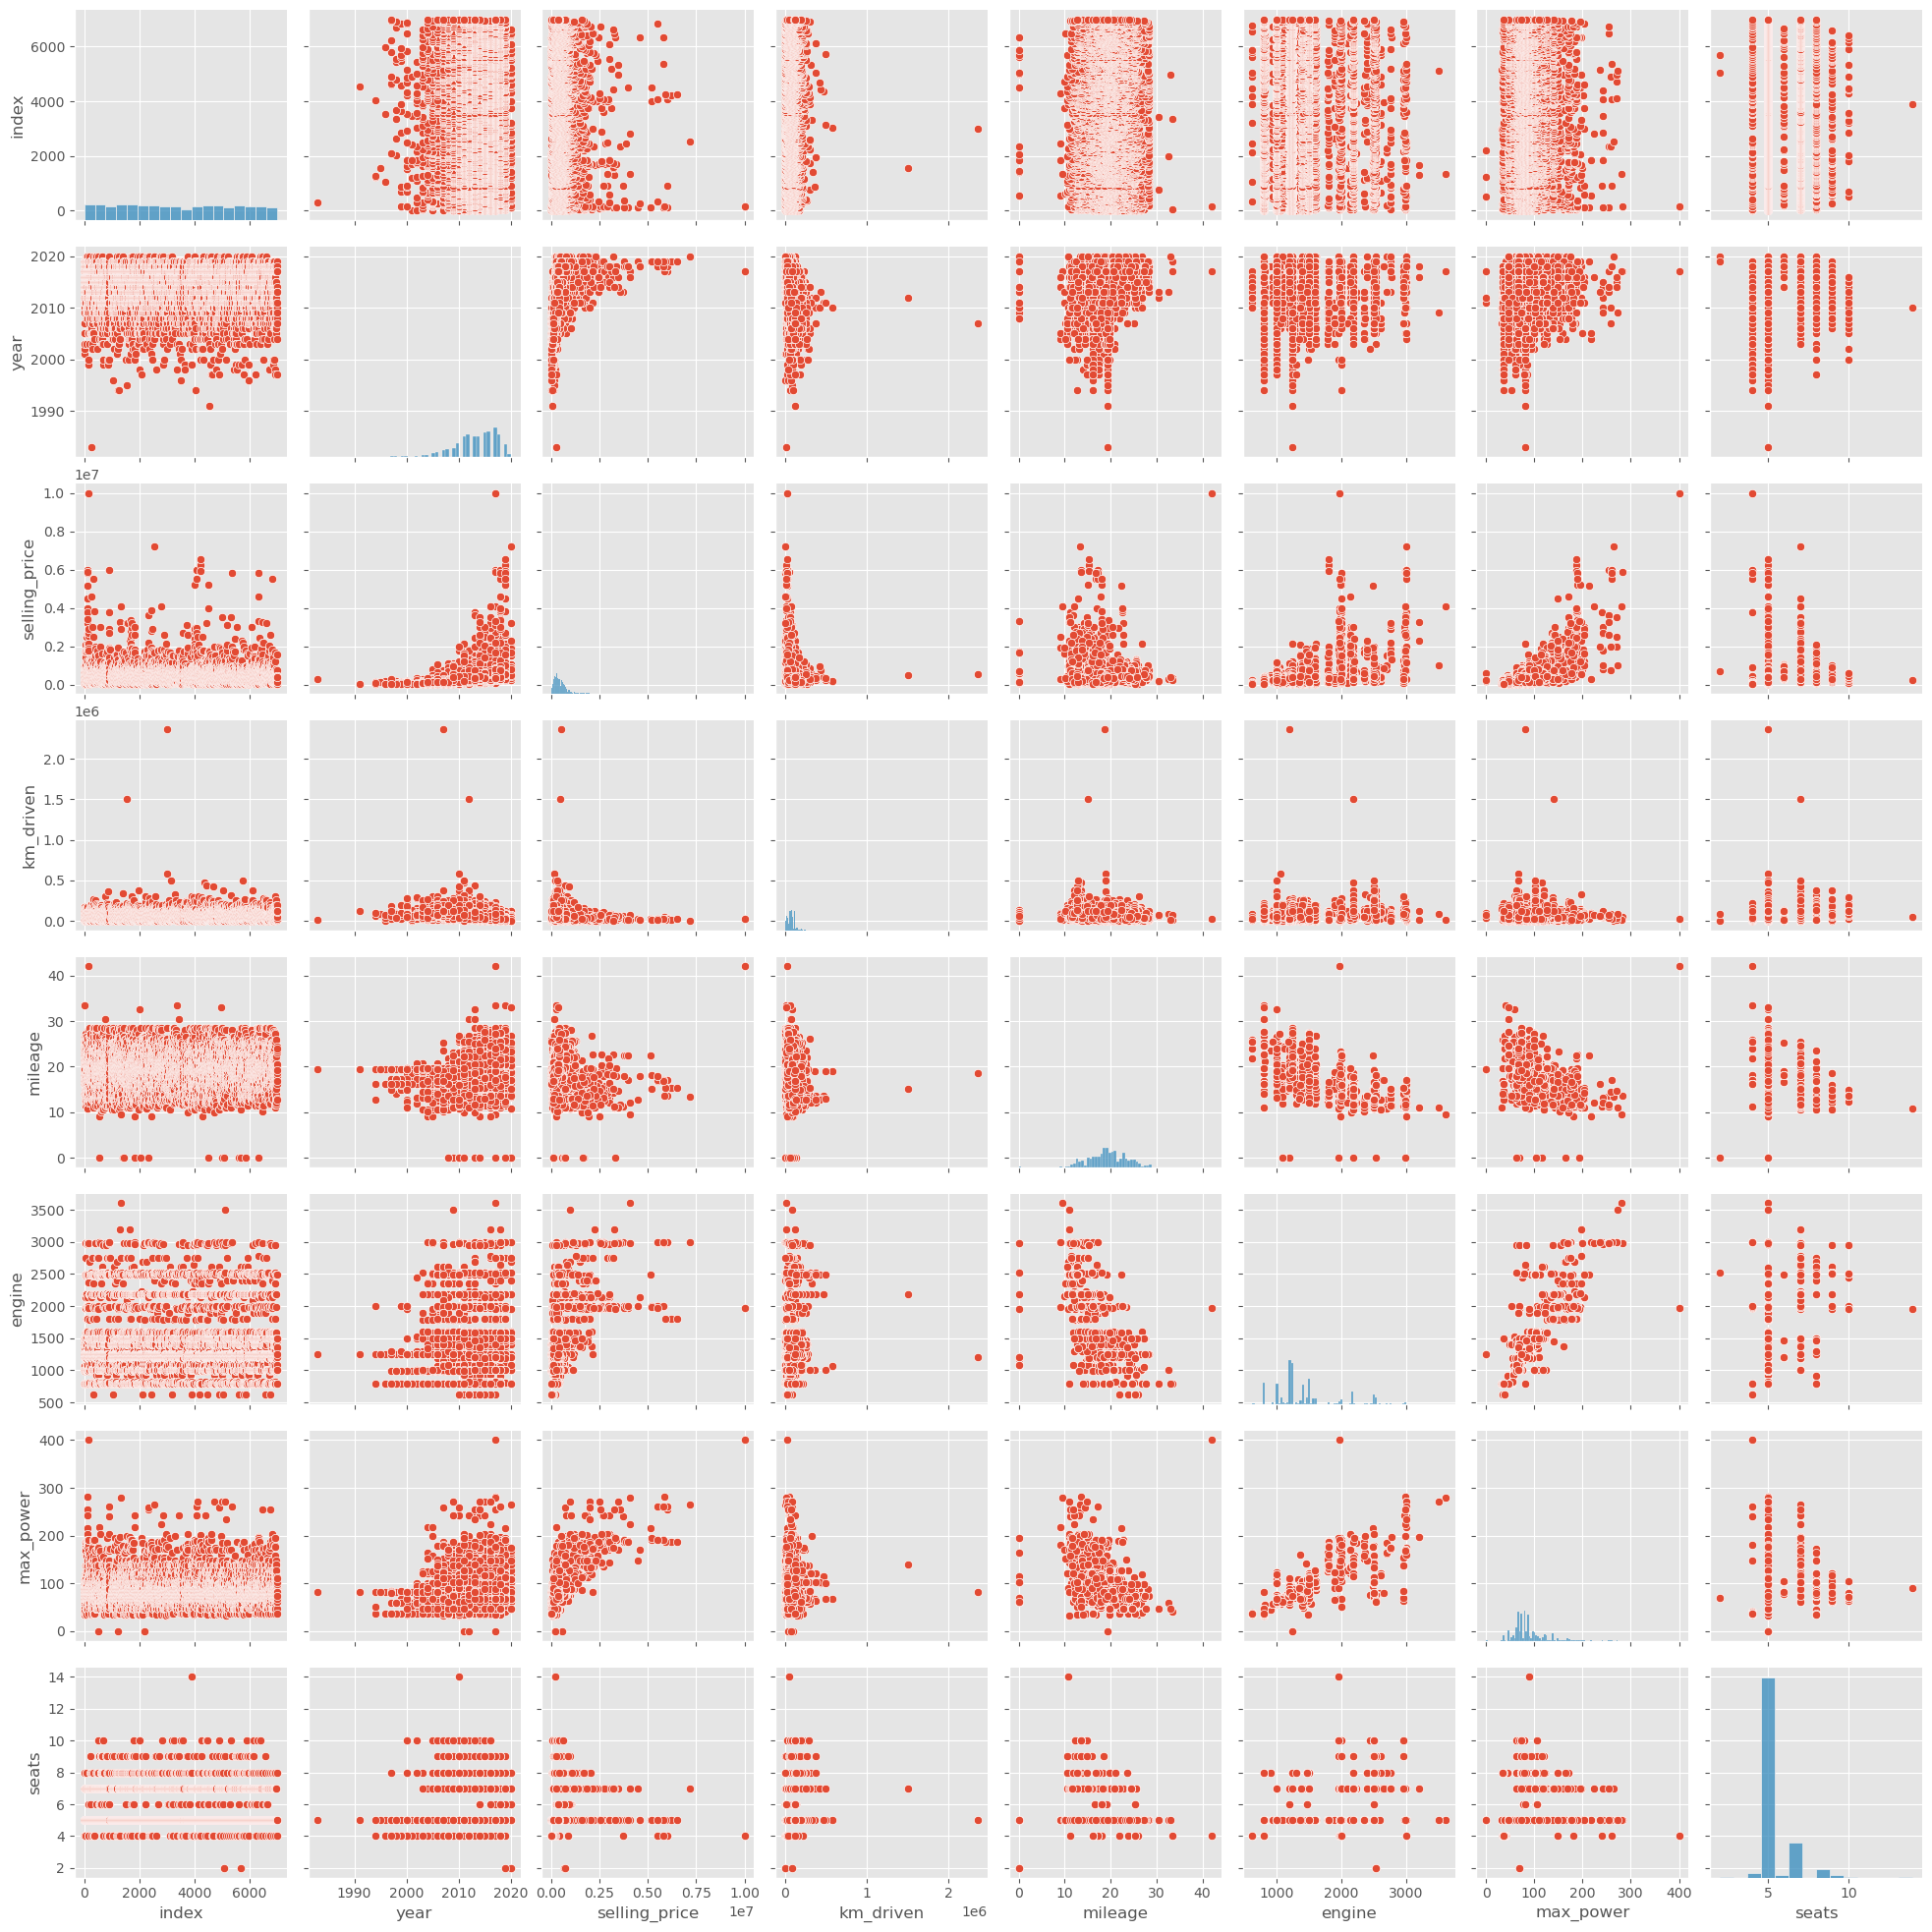

In [52]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [53]:
print('')

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

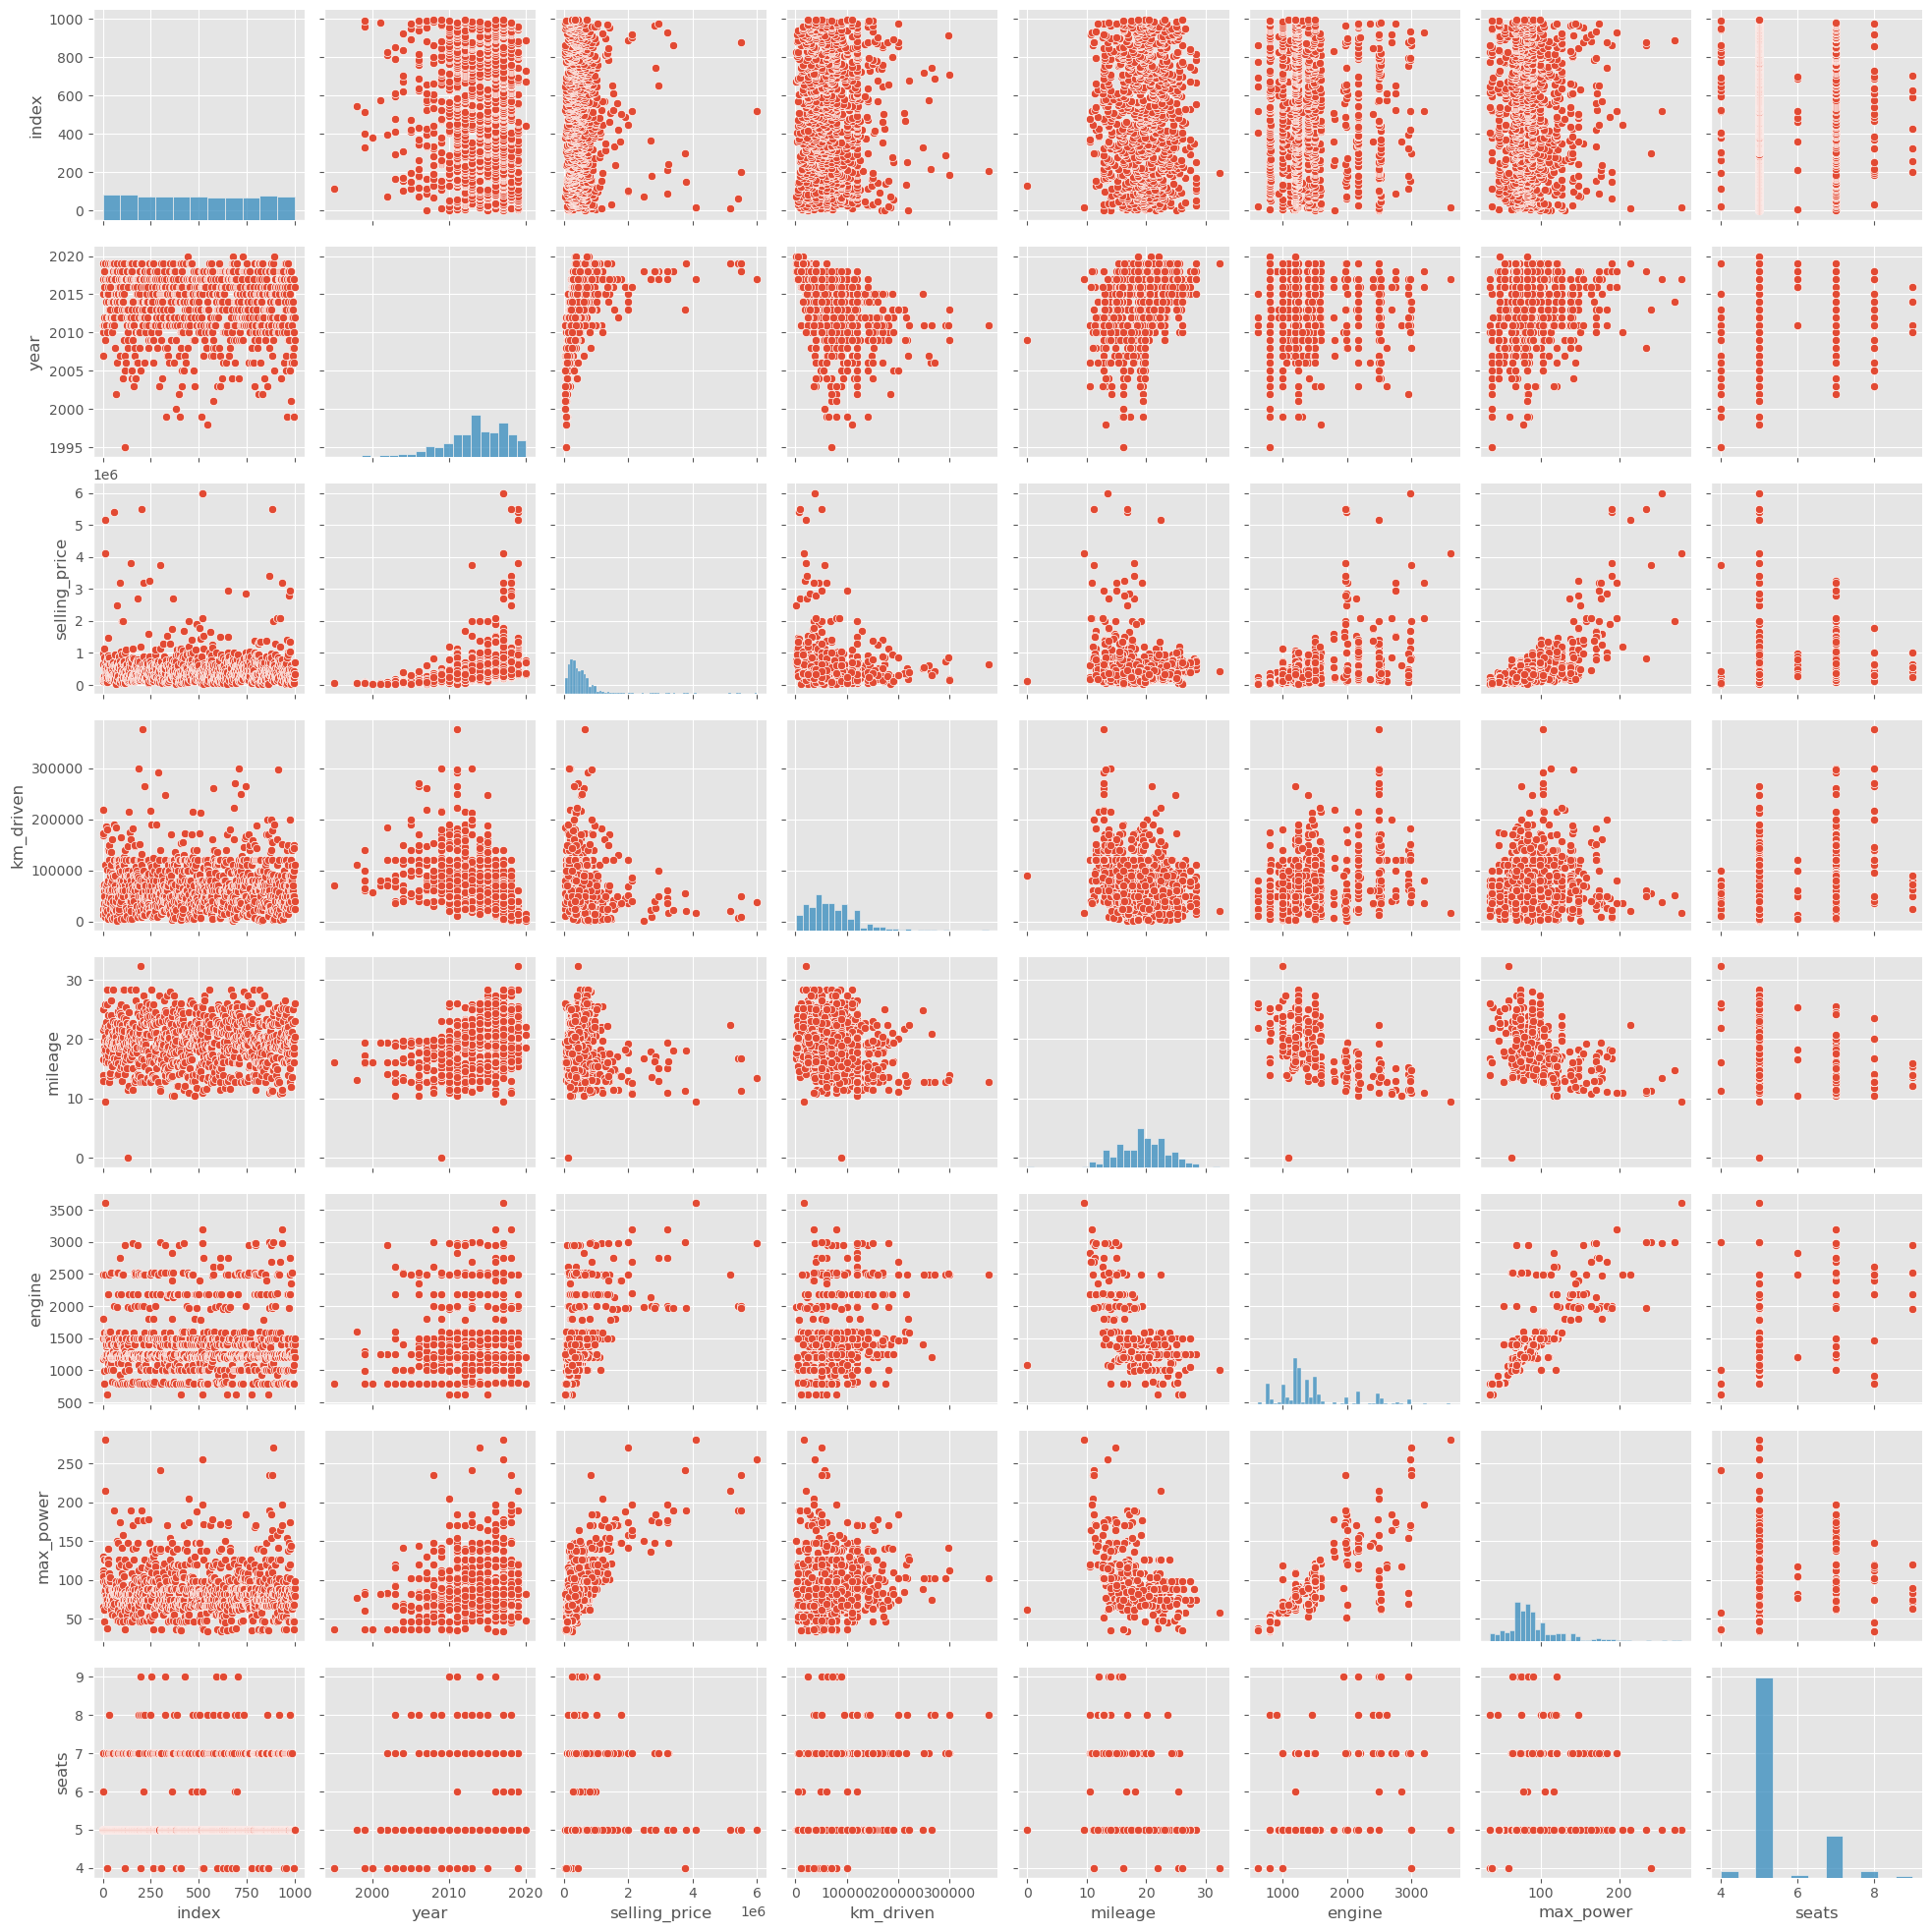

In [54]:
sns.pairplot(df_test)

In [55]:
print('Распределения оказались похожими')

Распределения оказались похожими


(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

In [56]:
df_train.corr()

,index,year,selling_price,km_driven,mileage,engine,max_power,seats
index,1.000000,-0.012502,-0.031405,0.024963,0.029790,-0.020392,-0.012487,-0.022710
year,-0.012502,1.000000,0.427279,-0.368966,0.341334,0.002819,0.156858,0.041178
selling_price,-0.031405,0.427279,1.000000,-0.164828,-0.104769,0.447672,0.692814,0.149953
km_driven,0.024963,-0.368966,-0.164828,1.000000,-0.182086,0.229766,0.024588,0.192328
mileage,0.029790,0.341334,-0.104769,-0.182086,1.000000,-0.572893,-0.373390,-0.451059
engine,-0.020392,0.002819,0.447672,0.229766,-0.572893,1.000000,0.681117,0.652172
max_power,-0.012487,0.156858,0.692814,0.024588,-0.373390,0.681117,1.000000,0.244112
seats,-0.022710,0.041178,0.149953,0.192328,-0.451059,0.652172,0.244112,1.000000


<AxesSubplot:>

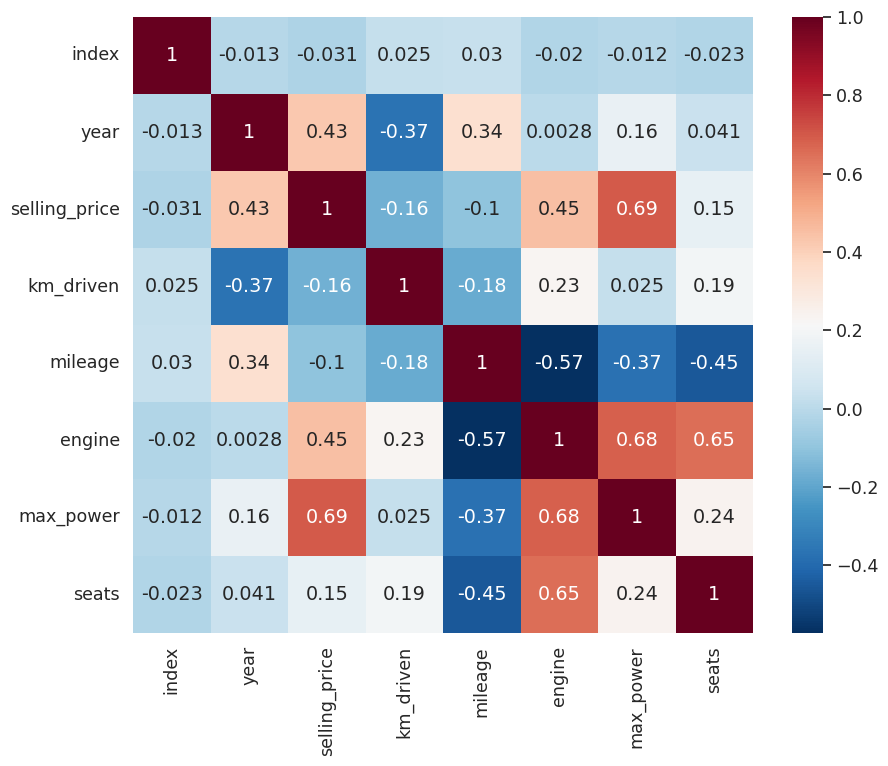

In [57]:
sns.set(font_scale=1.15)
plt.figure(figsize=(10,8))

sns.heatmap(df_train.corr(),  cmap='RdBu_r', annot=True)
            

#'km_driven', 'mileage', 'engine', 'max_power', 'seats'

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [58]:
print('Наименее скоррелированы между собой max_power и seats')
print('Довольно сильная положительная линейная зависимость наблюдается между max_power и selling_price')
print('Опираясь на данные, это неверно, корреляция признаков низкая')

Наименее скоррелированы между собой max_power и seats
Довольно сильная положительная линейная зависимость наблюдается между max_power и selling_price
Опираясь на данные, это неверно, корреляция признаков низкая


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

Text(0, 0.5, 'engine')

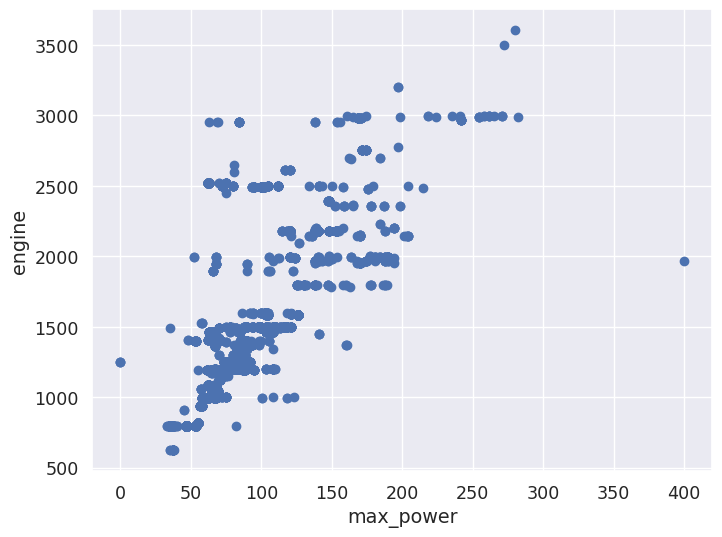

In [59]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x = df_train['max_power'], y = df_train['engine'])
plt.xlabel('max_power')
plt.ylabel('engine')

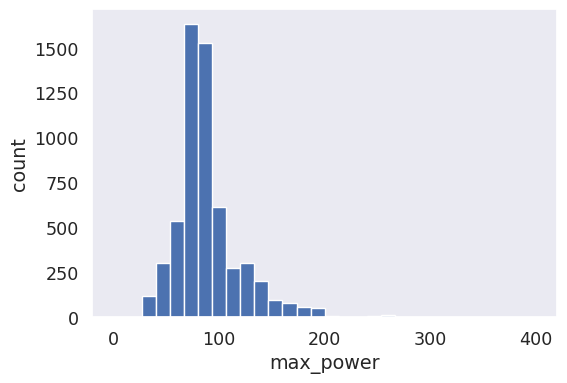

In [60]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()

ax.hist(df_train['max_power'], bins=30)
ax.grid()
plt.xlabel('max_power')
plt.ylabel('count')
 
plt.show()

Text(0, 0.5, 'selling_price')

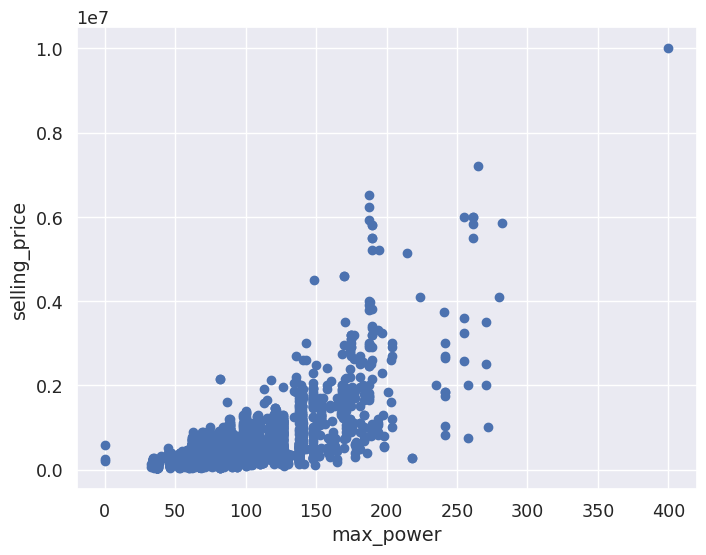

In [61]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x = df_train['max_power'], y = df_train['selling_price'])
plt.xlabel('max_power')
plt.ylabel('selling_price')

In [62]:
df_train = df_train[df_train['max_power']<350]

In [63]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5839 entries, 0 to 5839
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          5839 non-null   int64  
 1   name           5839 non-null   object 
 2   year           5839 non-null   int64  
 3   selling_price  5839 non-null   int64  
 4   km_driven      5839 non-null   int64  
 5   fuel           5839 non-null   object 
 6   seller_type    5839 non-null   object 
 7   transmission   5839 non-null   object 
 8   owner          5839 non-null   object 
 9   mileage        5839 non-null   float64
 10  engine         5839 non-null   int64  
 11  max_power      5839 non-null   float64
 12  seats          5839 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 638.6+ KB


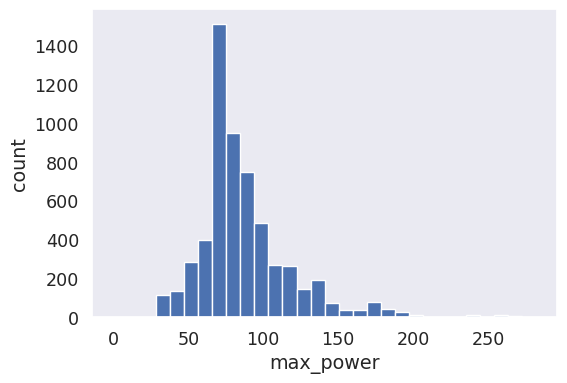

In [64]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()

ax.hist(df_train['max_power'], bins=30)
ax.grid()
plt.xlabel('max_power')
plt.ylabel('count')
 
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [65]:
df_train

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5
5836,6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5
5837,6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5
5838,6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5


# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [66]:
cat_features_mask = (df_train.dtypes == "object").values

y_train = df_train['selling_price']
X_train = df_train[df_train.columns[~cat_features_mask]].drop('selling_price', axis=1).drop('index', axis=1)

In [67]:
assert X_train.shape == (5839, 6)

In [68]:
y_test = df_test['selling_price']
X_test = df_test[df_test.columns[~cat_features_mask]].drop('selling_price', axis=1).drop('index', axis=1)

X_test 

,year,km_driven,mileage,engine,max_power,seats
0,2010,168000,14.00,2498,112.00,7
1,2017,25000,21.50,1497,108.50,5
2,2007,218463,12.90,1799,130.00,5
3,2015,173000,25.10,1498,98.60,5
4,2011,70000,16.50,1172,65.00,5
...,...,...,...,...,...,...
926,2008,100000,19.81,1086,68.05,5
927,2017,50000,18.60,1197,81.83,5
928,2009,40000,23.00,1396,90.00,5
929,2012,25000,20.36,1197,78.90,5


In [69]:
assert X_test.shape == (931, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [71]:
pred_mse = model.predict(X_test)

r2_score(y_test, pred_mse)

0.6123558664617323

In [72]:
MSE(y_test, pred_mse)

138805826015.86566

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [73]:
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X = pd.DataFrame(data=X_train_norm, columns=X_train.columns)

X

,year,km_driven,mileage,engine,max_power,seats
0,0.139716,1.190980,0.999500,-0.373460,-0.441518,-0.434709
1,0.139716,0.766464,0.430948,0.141355,0.499339,-0.434709
2,-0.837000,0.882997,0.898871,-0.068690,0.068431,-0.434709
3,-1.569537,0.766464,-0.836972,-0.270497,0.011062,-0.434709
4,0.872253,-0.482113,0.179377,-0.478482,-0.191005,-0.434709
...,...,...,...,...,...,...
5834,-1.325358,1.948450,-0.379112,-0.707060,-0.820793,-0.434709
5835,-0.104463,-0.398875,-0.132572,-0.888275,-0.661434,-0.434709
5836,-0.104463,0.599987,-0.233201,-0.478482,-0.159452,-0.434709
5837,-1.569537,0.749816,-0.660872,0.131058,0.705868,-0.434709


In [74]:
model.fit(X, y_train)
pred_mse = model.predict(X_test)

len(pred_mse)

931

In [75]:
r2_score(y_test, pred_mse)

-33150593.281011913

In [76]:
MSE(y_test, pred_mse)

1.1870412122819955e+19

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [77]:
print(model.coef_, model.intercept_)

[160436.60189033 -43569.78775556  14934.42692023  70630.20482153
 298597.90520801 -29226.2775258 ] 521337.0323685518


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [78]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X, y_train)

Lasso()

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [79]:
print(model.coef_, model.intercept_)

[160436.43573822 -43568.65444332  14932.52089115  70625.36592278
 298598.75999507 -29223.40256271] 521337.0323685518


In [80]:
import pickle
model_good = Lasso(alpha=201, max_iter=21, normalize=True)
model_good.fit(X, y_train)
model_good
filename = 'lasso_model.sav'
pickle.dump(model_good, open(filename, 'wb'))

In [81]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5839 entries, 0 to 5838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       5839 non-null   float64
 1   km_driven  5839 non-null   float64
 2   mileage    5839 non-null   float64
 3   engine     5839 non-null   float64
 4   max_power  5839 non-null   float64
 5   seats      5839 non-null   float64
dtypes: float64(6)
memory usage: 273.8 KB


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [82]:
from sklearn.model_selection import GridSearchCV

params = {'alpha' : np.arange(1, 10000, 100),
          'normalize': [True, False],
          'max_iter': np.arange(1, 100, 10)} # (0.5781515549442051, Lasso(alpha=201, max_iter=21, normalize=True))

params = {'alpha' : np.arange(0, 300, 10),
          'normalize': [True],
          'max_iter': np.arange(0, 30, 1)} # (0.5783381439002729, Lasso(alpha=250, max_iter=17, normalize=True))

gs = GridSearchCV(estimator=Lasso(), param_grid=params, cv=10)
gs.fit(X, y_train)

gs.best_score_, gs.best_estimator_

(0.5783381439002729, Lasso(alpha=250, max_iter=17, normalize=True))

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [83]:
len(pd.DataFrame(gs.cv_results_))

900

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [84]:
model = gs.best_estimator_
model.fit(X, y_train)
print(model.coef_, model.intercept_) #sparse_coef_

[151721.00562575 -23229.69426042      0.          14173.03795583
 305954.55565546     -0.        ] 521337.03236855206


In [85]:
#pred = model.predict(X_test)
#confusion_matrix(y_test, pred)

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [86]:
from sklearn.linear_model import ElasticNet

# params = {'alpha' : np.arange(1, 10000, 100),
#           'l1_ratio': np.arange(0.1, 1.0, 0.1),
#           'random_state': np.arange(0, 10, 1),
#           'max_iter': np.arange(1, 100, 10)}

params = {'alpha' : np.arange(1, 10, 1),
          'l1_ratio': np.arange(0.1, 0.9, 0.1),
          'random_state': np.arange(0, 10, 1),
          'max_iter': np.arange(1, 100, 10)}

gs = GridSearchCV(ElasticNet(), params, cv=10)

gs.fit(X, y_train)

gs.best_score_, gs.best_estimator_

(0.5773168054369988,
 ElasticNet(alpha=1, l1_ratio=0.8, max_iter=21, random_state=0))

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [87]:
print("alpha=1, l1_ratio=0.8, max_iter=21, random_state=0")

alpha=1, l1_ratio=0.8, max_iter=21, random_state=0


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [88]:
X_train_cat = df_train.drop(['index', 'name', 'selling_price'], axis='columns')
y_train_cat = df_train['selling_price']

In [89]:
assert X_train_cat.shape == (5839, 10)

In [90]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5839,5839,5839,5839
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5222,5336,3602


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [91]:
X_train_cat_filtered = X_train_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats']]

In [92]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

#пока тупо скопировала код из лекции
X_dum = pd.get_dummies(X_train_cat_filtered, drop_first=True)
print(X_dum.shape)
X_dum.head()

(5839, 11)


,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,5,1,0,0,1,0,1,0,0,0,0
1,5,1,0,0,1,0,1,0,1,0,0
2,5,1,0,0,1,0,1,0,0,0,0
3,5,0,0,1,1,0,1,0,0,0,0
4,5,0,0,1,1,0,1,0,0,0,0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [94]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here


params = {'alpha' : np.arange(1, 100, 20),
          'random_state': np.arange(0, 10, 2),
          'tol': np.arange(0.1, 1, 0.1),
          'max_iter': np.arange(1, 100, 20)}

# (0.3433743494622927, Ridge(alpha=21, max_iter=1, random_state=0, tol=0.1))

gs = GridSearchCV(Ridge(), params, cv=10, scoring='r2')

gs.fit(X_dum, y_train_cat)

gs.best_score_, gs.best_estimator_

(0.3433743494622927, Ridge(alpha=21, max_iter=1, random_state=0, tol=0.1))

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [95]:
def business_metrics(y_true, y_pred):
    count_pred = 0
    for y_true_item, y_pred_item in list(zip(y_true, y_pred)):
        percent_val = y_true_item * 0.1
        min_range, max_range = sorted((y_true_item + percent_val, y_true_item - percent_val))
        if min_range <= y_pred_item <= max_range:
            count_pred += 1
    return count_pred / len(y_pred)

In [96]:
def df_clear(df, target_label = 'selling_price'):
    cat_features_mask = (df_train.dtypes == "object").values
    y = df[target_label]
    X = df[df_train.columns[~cat_features_mask]].drop(target_label, axis=1).drop('index', axis=1)
    X_cols = X.columns
    X = StandardScaler().fit_transform(X)
    X = pd.DataFrame(data=X, columns=X_cols)
    
    return (X, y)

model = Lasso(alpha=250, max_iter=17, normalize=True)
model.fit(*df_clear(df_train))

df_X_test, df_y_test = df_clear(df_test)
predict_y = model.predict(df_X_test)

print('R2 & MSE:', [f(df_y_test, predict_y) for f in (r2_score, MSE)])
print(model.coef_, model.intercept_)


business_metrics(df_y_test, predict_y)

R2 & MSE: [0.5924031970923123, 145950385970.28687]
[151721.00562575 -23229.69426042      0.          14173.03795583
 305954.55565546     -0.        ] 521337.03236855206


0.24812030075187969

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)

\- *(HW1_Regression_with_inference.ipynb)*

* ``.py``-файл с реализацией сервиса

\- *(server.py)*

* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса

\- *(lasso_model.sav)*

* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

\- *(README.md)*


**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    
    \- *(Вместо скринов - TestServer.ipynb, демонстрирующий работу всех функций сервиса)*    
    
    
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link